<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Race" data-toc-modified-id="Race-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Race</a></span></li><li><span><a href="#Hairstyle" data-toc-modified-id="Hairstyle-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hairstyle</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#BMI" data-toc-modified-id="BMI-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>BMI</a></span></li><li><span><a href="#Health-Score" data-toc-modified-id="Health-Score-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Health Score</a></span></li></ul></div>

# Setup

In [ ]:
import pandas as pd
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load Data

In [ ]:
df = pd.read_csv("/content/labels_inmates_complete_cleaned.csv")

In [ ]:
len(df)

59852

In [ ]:
df.head()

,id,weight,height,sex,hair,race,age,BMI,bmi_class,health_score
0,A00147,83.914520,170.18,1,Brown,White,34,28.974775,Overweight,479
1,A00360,75.749864,175.26,1,Gray or Partially Gray,White,42,24.661316,Healthy weight,511
2,A00367,111.130040,182.88,1,Black,Black,63,33.227605,Class 1 Obesity,449
3,A01054,75.296272,170.18,1,Salt and Pepper,Black,34,25.998988,Overweight,494
4,A01072,88.450440,175.26,1,Black,Black,18,28.796147,Overweight,468


# Gender

In [ ]:
def create_gender_countplot(df):
    sns.countplot(x='sex', data=df, palette = "Blues")
    sns.set(style="darkgrid")
    plt.title('Proportion of Male and Female Observations')
    plt.xlabel('Gender')
    plt.ylabel('Count')

    # calculate counts and percentages
    counts = df['sex'].value_counts(ascending = True)
    total_count = counts.sum()
    percentages = [(count/total_count)*100 for count in counts]

    # add count and percentage labels above each bar
    for i, (count, percentage) in enumerate(zip(counts, percentages)):
        plt.text(i, count+700, f"{count}\n({percentage:.1f}%)", ha='center')

    plt.xticks([0, 1], ['Female', 'Male'])
    plt.ylim(top=65000)

    plt.savefig('gender_countplot.png', bbox_inches='tight')
    plt.show()

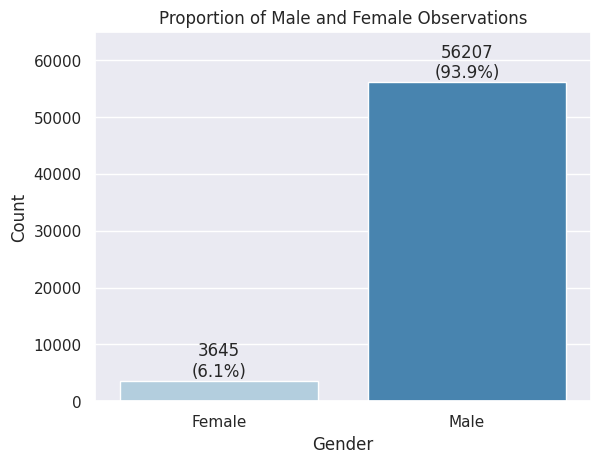

In [ ]:
create_gender_countplot(df)

# Race

In [ ]:
def create_race_countplot(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='race', data=df, palette = "Blues", order = df['race'].value_counts().index)
    sns.set(style="darkgrid")
    plt.title('Racial Distribution')
    plt.xlabel('Race')
    plt.ylabel('Count')

    # calculate counts and percentages
    counts = df['race'].value_counts()
    total_count = counts.sum()
    percentages = [(count/total_count)*100 for count in counts]

    # add count and percentage labels above each bar
    for i, (count, percentage) in enumerate(zip(counts, percentages)):
        plt.text(i, count+500, f"{count}\n({percentage:.1f}%)", ha='center')

    plt.ylim(top=38300)

    plt.savefig('race_countplot.png', bbox_inches='tight')
    plt.show()

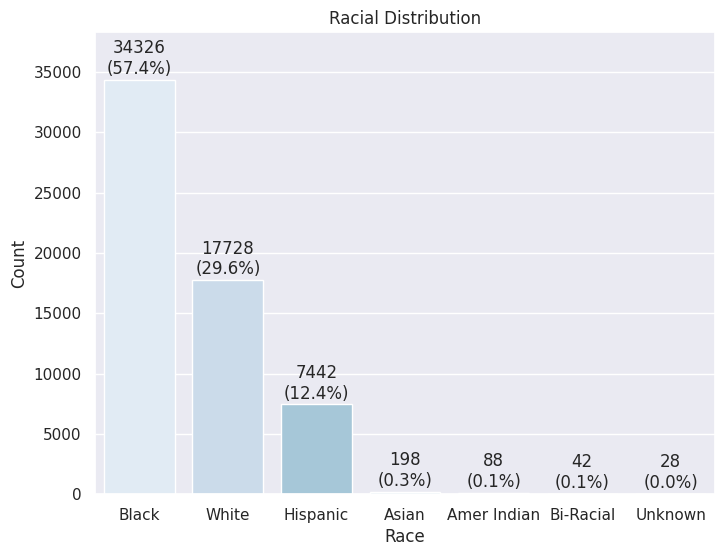

In [ ]:
create_race_countplot(df)

# Hairstyle

In [ ]:
def create_hair_countplot(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='hair', data=df, palette = "Blues", order = df['hair'].value_counts().index)
    sns.set(style="darkgrid")
    plt.title('Distribution of Hairstyles')
    plt.xlabel('Hairstyle')
    plt.ylabel('Count')

    # calculate counts and percentages
    counts = df['hair'].value_counts()
    total_count = counts.sum()
    percentages = [(count/total_count)*100 for count in counts]

    # add count and percentage labels above each bar
    for i, (count, percentage) in enumerate(zip(counts, percentages)):
        plt.text(i, count+500, f"{count}\n({percentage:.1f}%)", ha='center')

    plt.ylim(top=44000)
    plt.xticks(rotation=90)

    plt.savefig('hair_countplot.png', bbox_inches='tight')
    plt.show()

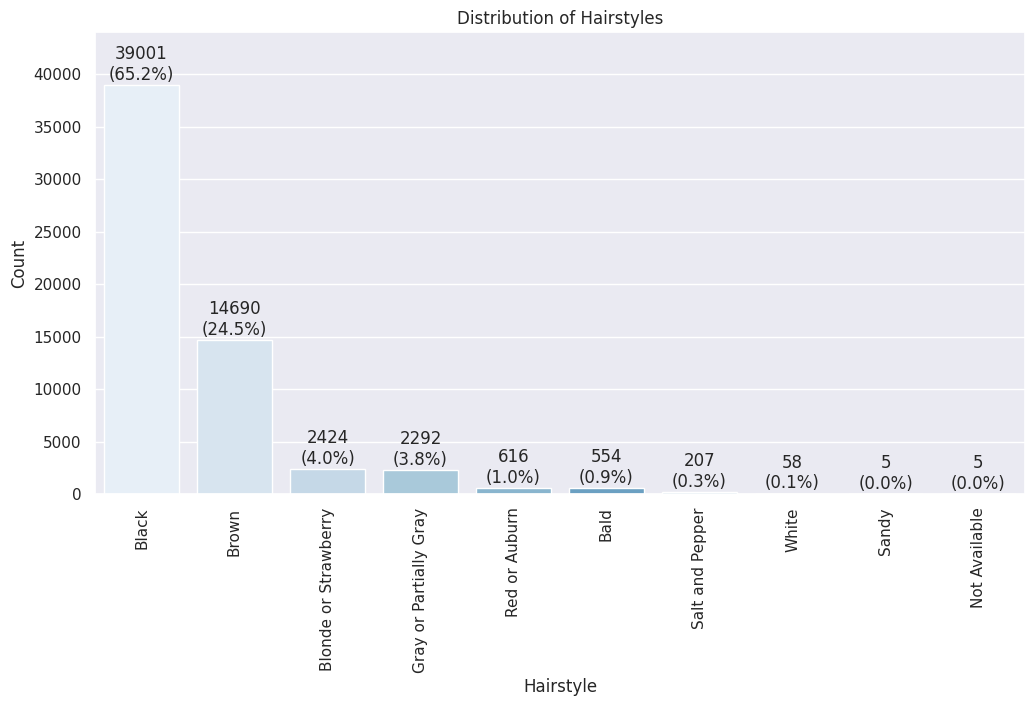

In [ ]:
create_hair_countplot(df)

# Age

In [ ]:
def plot_age_desnity(df):
    plt.figure(figsize=(9, 6))
    # Filter the df by sex
    male_age = df.loc[df['sex'] == 1, 'age']
    female_age = df.loc[df['sex'] == 0, 'age']
    
    # Create the plot using seaborn
    sns.kdeplot(data=male_age, label='Male', fill=True, alpha=0.3)
    sns.kdeplot(data=female_age, color='pink', label='Female', fill=True)
    sns.set(style="darkgrid")
    
    # calculate and display mean, median, and std values
    male_mean = male_age.mean()
    male_median = male_age.median()
    male_std = male_age.std()
    female_mean = female_age.mean()
    female_median = female_age.median()
    female_std = female_age.std()
    
    # add a vertical line at the mean and display mean, median, and std values in the legend
    plt.axvline(male_mean, color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(female_mean, color='pink', linestyle='dashed', linewidth=1)
  
    plt.xlabel('Age')
    plt.ylabel('Density')
    
    # create the legend with mean, median, and std values and the mean line
    male_legend = f"Male Mean: {male_mean:.1f}, Median: {male_median:.1f}, Std: {male_std:.1f}"
    female_legend = f"Female Mean: {female_mean:.1f}, Median: {female_median:.1f}, Std: {female_std:.1f}"
    plt.legend([male_legend, female_legend, 'Male Mean', 'Female Mean'], fontsize=10, facecolor='white')

    plt.title("Age Density Plot by Gender")
    plt.savefig('age_desnity.png', bbox_inches='tight')
    plt.show()

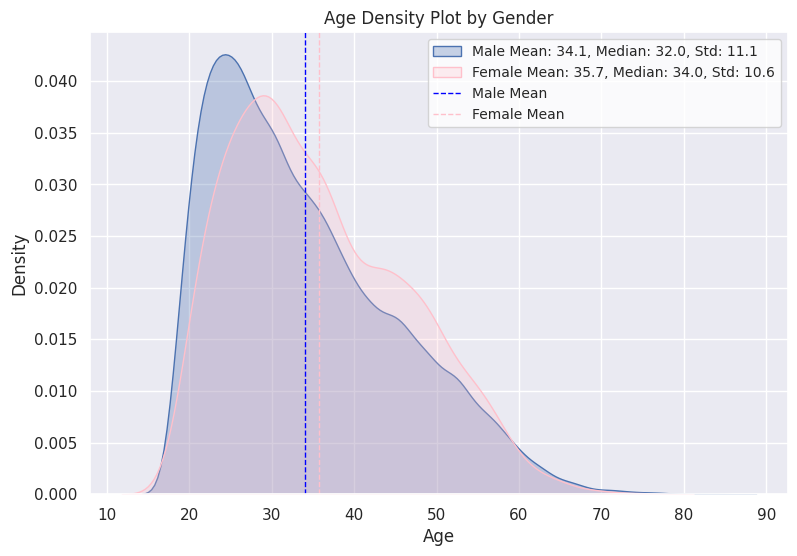

In [ ]:
plot_age_desnity(df)

# BMI

In [ ]:
def create_bmi_class_countplot(df):
    plt.figure(figsize=(10, 6))
    order=['Underweight','Healthy weight', 'Overweight', 'Class 1 Obesity', 'Class 2 Obesity', 'Class 3 Obesity']  
    sns.countplot(x='bmi_class', data=df, palette = "Blues",order=order)
    sns.set(style="darkgrid")
    plt.title('Distribution of BMI Classes')
    plt.xlabel('BMI Class')
    plt.ylabel('Count')

    # add count and percentage labels above each bar
    counts = df['bmi_class'].value_counts()
    total_count = counts.sum()

    for i, bmi_class in enumerate(order):
        count = counts[bmi_class]
        percentage = (count/total_count)*100
        plt.text(i, count+500, f"{count}\n({percentage:.1f}%)", ha='center')

    plt.ylim(top=28000)

    plt.savefig('bmi_class_countplot.png', bbox_inches='tight')
    plt.show()


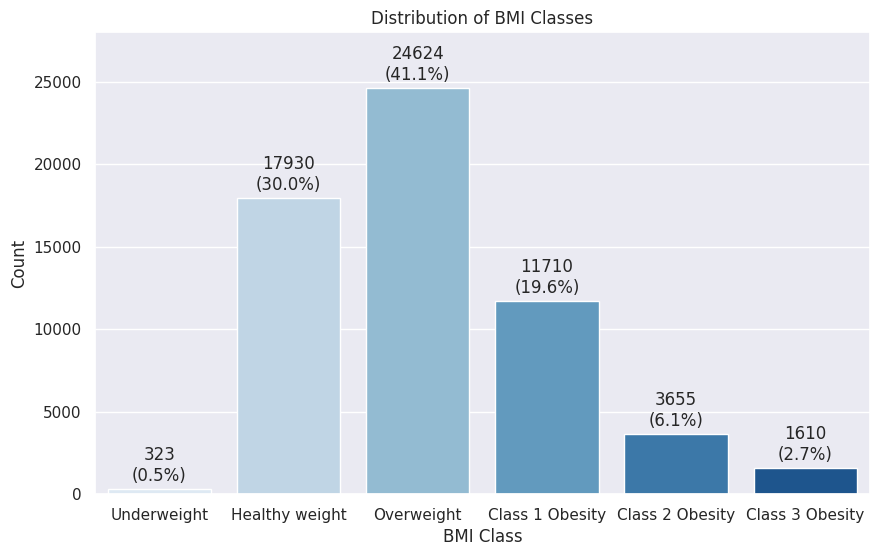

In [ ]:
create_bmi_class_countplot(df)

In [ ]:
def plot_bmi_density_by_race(df):
    plt.figure(figsize=(8, 6))
    # Filter the df by race
    black_bmi = df.loc[df['race'] == 'Black', 'BMI']
    white_bmi = df.loc[df['race'] == 'White', 'BMI']
    hispanic_bmi = df.loc[df['race'] == 'Hispanic', 'BMI']
    
    # Create the plot using seaborn
    sns.kdeplot(data=black_bmi, label='Black', fill=True, alpha=0.3)
    sns.kdeplot(data=white_bmi, label='White', fill=True, alpha=0.3)
    sns.kdeplot(data=hispanic_bmi, label='Hispanic', fill=True, alpha=0.3)
    sns.set(style="darkgrid")
    
    # calculate and display mean, median, and std values
    black_mean = black_bmi.mean()
    black_median = black_bmi.median()
    black_std = black_bmi.std()
    white_mean = white_bmi.mean()
    white_median = white_bmi.median()
    white_std = white_bmi.std()
    hispanic_mean = hispanic_bmi.mean()
    hispanic_median = hispanic_bmi.median()
    hispanic_std = hispanic_bmi.std()
    
    # add a vertical line at the mean and display mean, median, and std values in the legend
    plt.axvline(black_mean, color='darkorange', linestyle='dashed', linewidth=1)
    plt.axvline(white_mean, color='darkblue', linestyle='dashed', linewidth=1)
    plt.axvline(hispanic_mean, color='green', linestyle='dashed', linewidth=1)
  
    plt.xlabel('BMI')
    plt.ylabel('Density')
    
    # create the legend with mean, median, and std values and the mean line
    black_legend = f"Black Mean: {black_mean:.1f}, Median: {black_median:.1f}, Std: {black_std:.1f}"
    white_legend = f"White Mean: {white_mean:.1f}, Median: {white_median:.1f}, Std: {white_std:.1f}"
    hispanic_legend = f"Hispanic Mean: {hispanic_mean:.1f}, Median: {hispanic_median:.1f}, Std: {hispanic_std:.1f}"
    plt.legend([black_legend, white_legend, hispanic_legend, 'Black Mean', 'White Mean', 'Hispanic Mean'], fontsize=10, facecolor='white')

    plt.title("BMI Density Plot by Race")
    plt.savefig('bmi_density_by_race.png', bbox_inches='tight')
    plt.show()


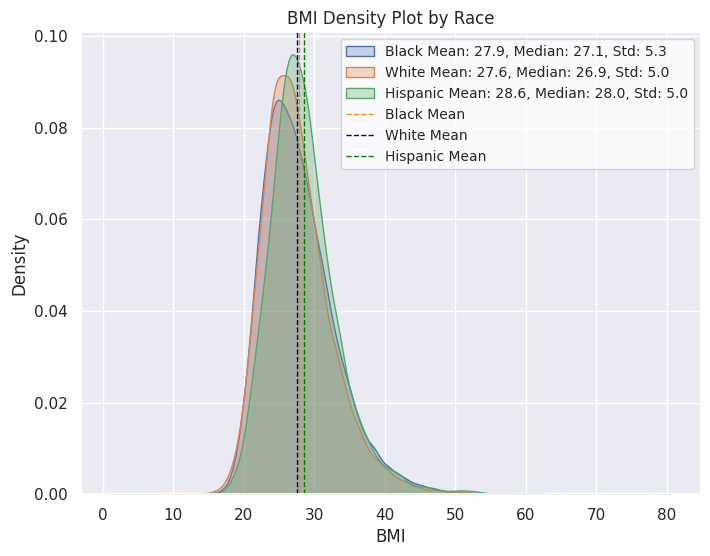

In [ ]:
plot_bmi_density_by_race(df)

In [ ]:
def plot_bmi_desnity(df):
    plt.figure(figsize=(8, 6))
    # Filter the df by sex
    male_bmi = df.loc[df['sex'] == 1, 'BMI']
    female_bmi = df.loc[df['sex'] == 0, 'BMI']
    
    # Create the plot using seaborn
    sns.kdeplot(data=male_bmi, label='Male', fill=True, alpha=0.3)
    sns.kdeplot(data=female_bmi, color='pink', label='Female', fill=True)
    sns.set(style="darkgrid")
    
    # calculate and display mean, median, and std values
    male_mean = male_bmi.mean()
    male_median = male_bmi.median()
    male_std = male_bmi.std()
    female_mean = female_bmi.mean()
    female_median = female_bmi.median()
    female_std = female_bmi.std()
    
    # add a vertical line at the mean and display mean, median, and std values in the legend
    plt.axvline(male_mean, color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(female_mean, color='pink', linestyle='dashed', linewidth=1)
  
    plt.xlabel('BMI')
    plt.ylabel('Density')
    
    # create the legend with mean, median, and std values and the mean line
    male_legend = f"Male Mean: {male_mean:.1f}, Median: {male_median:.1f}, Std: {male_std:.1f}"
    female_legend = f"Female Mean: {female_mean:.1f}, Median: {female_median:.1f}, Std: {female_std:.1f}"
    plt.legend([male_legend, female_legend, 'Male Mean', 'Female Mean'], fontsize=10, facecolor='white')

    plt.title("BMI Density Plot by Gender")
    plt.savefig('bmi_desnity_gender.png', bbox_inches='tight')
    plt.show()



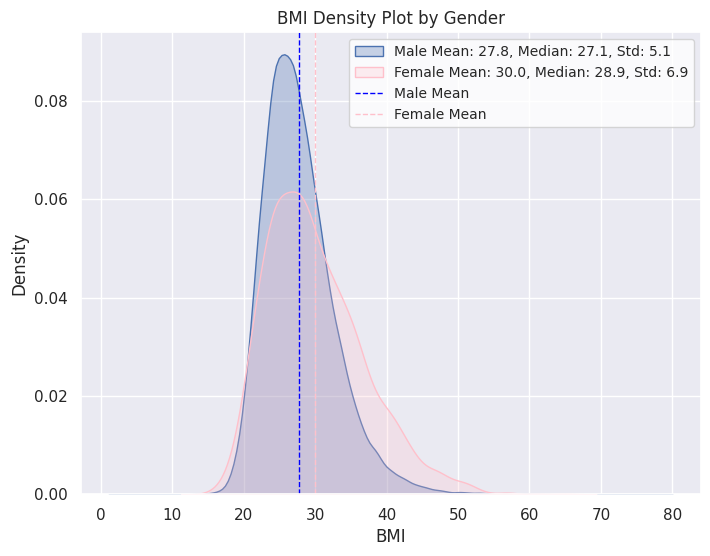

In [ ]:
plot_bmi_desnity(df)

In [ ]:
def scatter_age_bmi_gender(df):
    plt.figure(figsize=(8, 6))
    # Separate the data by gender
    male_data = df[df['sex'] == 1]
    female_data = df[df['sex'] == 0]
    
    # Plot the scatter plot with separate alpha values for each gender
    ax = sns.scatterplot(data=male_data, x='age', y='BMI')
    sns.scatterplot(data=female_data, x='age', y='BMI', color='pink', ax=ax)
    sns.set(style="darkgrid")
    
    # Add a trendline and correlation value to the plot
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['age'],df['BMI'])
    sns.regplot(data=df, x='age', y='BMI', ax=ax, scatter=False, color='black', label=f'Trendline: {slope:.2f}x + {intercept:.2f}\nCorrelation: {r_value:.2f}')
    
    # Add labels, title, and legend
    ax.set_xlabel('Age')
    ax.set_ylabel('BMI')
    ax.set_title('BMI vs Age by Gender')
    ax.legend(loc='upper right', labels=['Male', 'Female', f'Trendline: {slope:.2f}x + {intercept:.2f}\nCorrelation: {r_value:.2f}'], markerscale=2, facecolor='white')

    plt.savefig('scatter_age_bmi_gender.png', bbox_inches='tight')
    plt.show()


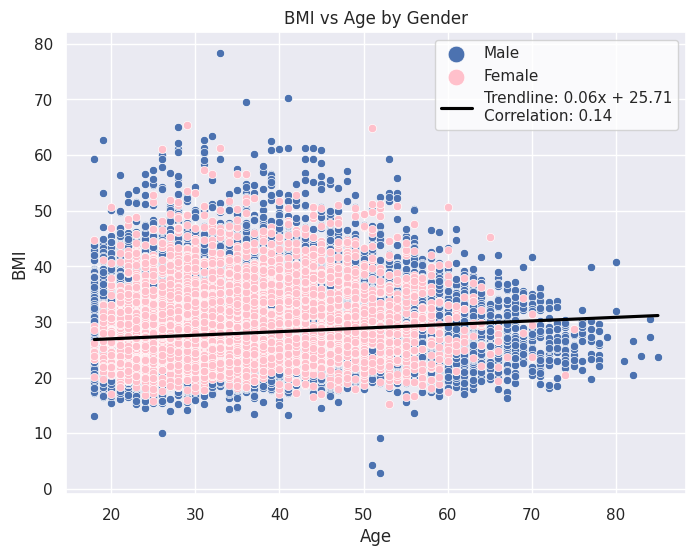

In [ ]:
scatter_age_bmi_gender(df)

# Health Score

In [ ]:
def plot_hs_density_by_race(df):
    plt.figure(figsize=(9, 6))
    # Filter the df by race
    black_hs = df.loc[df['race'] == 'Black', 'health_score']
    white_hs = df.loc[df['race'] == 'White', 'health_score']
    hispanic_hs = df.loc[df['race'] == 'Hispanic', 'health_score']
    
    # Create the plot using seaborn
    sns.kdeplot(data=black_hs, label='Black', fill=True, alpha=0.3)
    sns.kdeplot(data=white_hs, label='White', fill=True, alpha=0.3)
    sns.kdeplot(data=hispanic_hs, label='Hispanic', fill=True, alpha=0.3)
    sns.set(style="darkgrid")
    
    # calculate and display mean, median, and std values
    black_mean = black_hs.mean()
    black_median = black_hs.median()
    black_std = black_hs.std()
    white_mean = white_hs.mean()
    white_median = white_hs.median()
    white_std = white_hs.std()
    hispanic_mean = hispanic_hs.mean()
    hispanic_median = hispanic_hs.median()
    hispanic_std = hispanic_hs.std()
    
    # add a vertical line at the mean and display mean, median, and std values in the legend
    plt.axvline(black_mean, color='darkorange', linestyle='dashed', linewidth=1)
    plt.axvline(white_mean, color='darkblue', linestyle='dashed', linewidth=1)
    plt.axvline(hispanic_mean, color='green', linestyle='dashed', linewidth=1)
  
    plt.xlabel('Health Score')
    plt.ylabel('Density')
    
    # create the legend with mean, median, and std values and the mean line
    black_legend = f"Black Mean: {black_mean:.1f}, Median: {black_median:.1f}, Std: {black_std:.1f}"
    white_legend = f"White Mean: {white_mean:.1f}, Median: {white_median:.1f}, Std: {white_std:.1f}"
    hispanic_legend = f"Hispanic Mean: {hispanic_mean:.1f}, Median: {hispanic_median:.1f}, Std: {hispanic_std:.1f}"
    plt.legend([black_legend, white_legend, hispanic_legend, 'Black Mean', 'White Mean', 'Hispanic Mean'], fontsize=10, facecolor='white')

    plt.title("Health Score Density Plot by Race")
    plt.savefig('hs_density_by_race.png', bbox_inches='tight')
    plt.show()

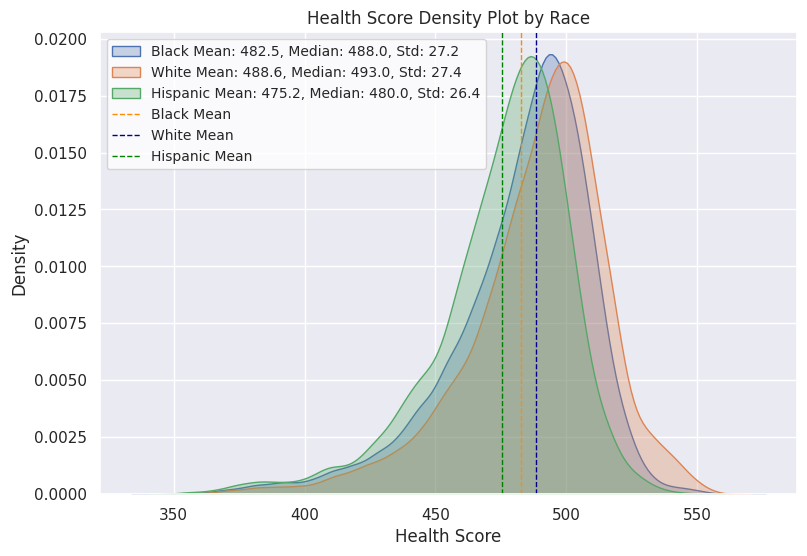

In [ ]:
plot_hs_density_by_race(df)

In [ ]:
def plot_hs_desnity(df):
    plt.figure(figsize=(9, 6))
    # Filter the df by sex
    male_hs = df.loc[df['sex'] == 1, 'health_score']
    female_hs = df.loc[df['sex'] == 0, 'health_score']
    
    # Create the plot using seaborn
    sns.kdeplot(data=male_hs, label='Male', fill=True, alpha=0.3)
    sns.kdeplot(data=female_hs, color='pink', label='Female', fill=True)
    sns.set(style="darkgrid")
    
    # calculate and display mean, median, and std values
    male_mean = male_hs.mean()
    male_median = male_hs.median()
    male_std = male_hs.std()
    female_mean = female_hs.mean()
    female_median = female_hs.median()
    female_std = female_hs.std()
    
    # add a vertical line at the mean and display mean, median, and std values in the legend
    plt.axvline(male_mean, color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(female_mean, color='pink', linestyle='dashed', linewidth=1)
  
    plt.xlabel('HS')
    plt.ylabel('Density')
    
    # create the legend with mean, median, and std values and the mean line
    male_legend = f"Male Mean: {male_mean:.1f}, Median: {male_median:.1f}, Std: {male_std:.1f}"
    female_legend = f"Female Mean: {female_mean:.1f}, Median: {female_median:.1f}, Std: {female_std:.1f}"
    plt.legend([male_legend, female_legend, 'Male Mean', 'Female Mean'], fontsize=10, facecolor='white')

    plt.title("HS Density Plot by Gender")
    plt.show()

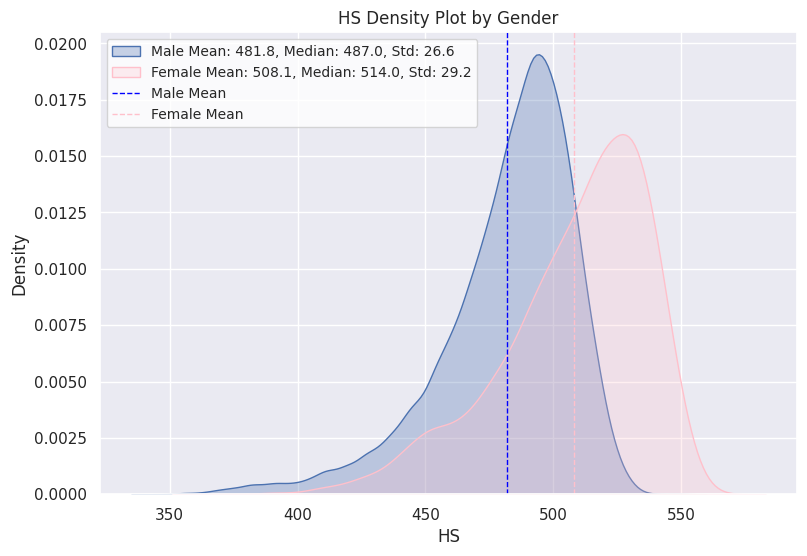

In [ ]:
plot_hs_desnity(df)

In [ ]:
def scatter_hs_bmi_gender(df):
    # Separate the data by gender
    male_data = df[df['sex'] == 1]
    female_data = df[df['sex'] == 0]
    
    # Plot the scatter plot with separate alpha values for each gender
    ax = sns.scatterplot(data=male_data, y='health_score', x='BMI')
    sns.scatterplot(data=female_data, y='health_score', x='BMI', color='pink', ax=ax)
    sns.set(style="darkgrid")
    
    # Add a trendline and correlation value to the plot
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['BMI'],df['health_score'])
    sns.regplot(data=df, x='BMI', y='health_score', ax=ax, scatter=False, color='black', label=f'Trendline: {slope:.2f}x + {intercept:.2f}\nCorrelation: {r_value:.2f}')
    
    # Add labels, title, and legend
    ax.set_xlabel('BMI')
    ax.set_ylabel('HS')
    ax.set_title('HS vs BMI by Gender')
    ax.legend(loc='upper right', labels=['Male', 'Female', f'Trendline: {slope:.2f}x + {intercept:.2f}\nCorrelation: {r_value:.2f}'], markerscale=2, facecolor='white')
    
    plt.savefig('scatter_hs_bmi_gender.png', bbox_inches='tight')
    plt.show()

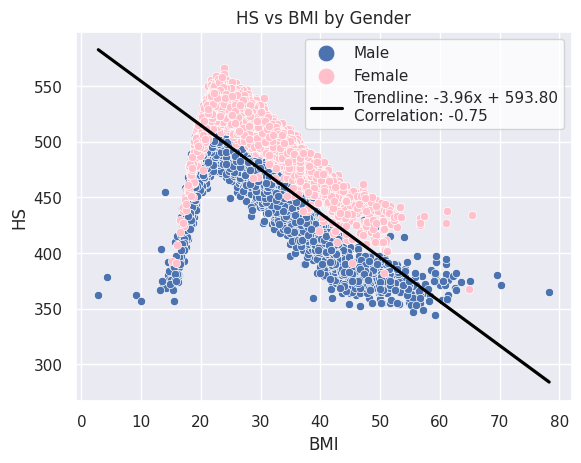

In [ ]:
scatter_hs_bmi_gender(df)

In [ ]:
def scatter_hs_bmi_gender_cut(df):
    # Exclude BMI values < 24
    df_temp = df[df['BMI'] > 24]
    size = len(df_temp)

    # Separate the data by gender
    male_data = df_temp[df_temp['sex'] == 1]
    female_data = df_temp[df_temp['sex'] == 0]
    
    # Plot the scatter plot with separate alpha values for each gender
    ax = sns.scatterplot(data=male_data, y='health_score', x='BMI')
    sns.scatterplot(data=female_data, y='health_score', x='BMI', color='pink', ax=ax)
    sns.set(style="darkgrid")
    
    # Add a trendline and correlation value to the plot
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_temp['BMI'],df_temp['health_score'])
    sns.regplot(data=df_temp, x='BMI', y='health_score', ax=ax, scatter=False, color='black', label=f'Trendline: {slope:.2f}x + {intercept:.2f}\nCorrelation: {r_value:.2f}')
    
    # Add labels, title, and legend
    ax.set_xlabel('BMI')
    ax.set_ylabel('HS')
    ax.set_title('BMI > 24 vs HS by Gender')
    ax.legend(loc='upper right', labels=['Male', 'Female', f'Trendline: {slope:.2f}x + {intercept:.2f}\nCorrelation: {r_value:.2f}\nNumber of Samples: {size}'], markerscale=2, facecolor='white')
    
    plt.savefig('scatter_hs_bmi_gender_cut.png', bbox_inches='tight')
    plt.show()

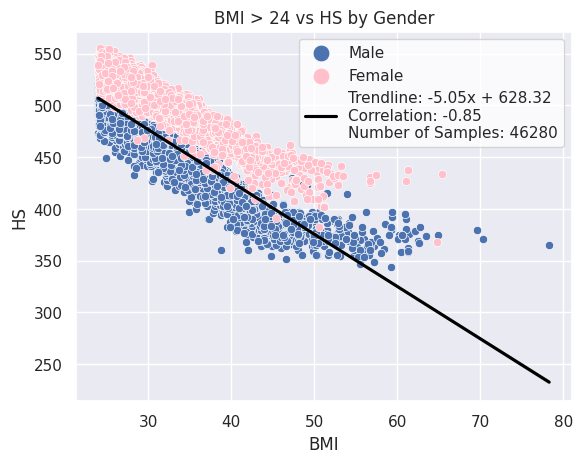

In [ ]:
scatter_hs_bmi_gender_cut(df)